In [1]:
import numpy as np
import pandas as pd
import torch

In [2]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

In [3]:
#reading the data
df= pd.read_csv("/kaggle/input/fraudulent-transactions-data/Fraud.csv")
#getting the number of rows and columns
df.shape

(6362620, 11)

In [4]:
#head of the data
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [5]:
#tail of the data
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362420,727,TRANSFER,124582.58,C651444933,124582.58,0.0,C1161818914,0.00,0.00,1,0
6362421,727,CASH_OUT,124582.58,C1098290230,124582.58,0.0,C1739564153,320485.06,445067.64,1,0
6362422,727,TRANSFER,263401.81,C806437930,263401.81,0.0,C1469754483,0.00,0.00,1,0
6362423,727,CASH_OUT,263401.81,C850961884,263401.81,0.0,C1203132980,251586.80,514988.60,1,0
6362424,727,TRANSFER,69039.64,C922622756,69039.64,0.0,C417851521,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [6]:
#checking for null values if any
df.isnull().values.any()

False

In [7]:
#collect more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#legit transactions
legit = len(df[df.isFraud==0])
#fraud transactions
fraud = len(df[df.isFraud==1])

#legit transactions percentage
legit_perc = round((legit/(legit+fraud))*100,2)

#fraud transactions percentage
fraud_perc = round((fraud/(legit+fraud))*100,2)

print("Number of legit transactions: ",legit)
print("Number of fraud transactions: ",fraud)
print(f"{legit_perc}% are legit transactions in this dataset")
print(f"{fraud_perc}% are fraud transactions in this dataset")




Number of legit transactions:  6354407
Number of fraud transactions:  8213
99.87% are legit transactions in this dataset
0.13% are fraud transactions in this dataset


Since we are dealing with the higly imbalanced data where legit transactions cover around 99.87% while fraud transactions are just 0.13% of the data, the best way to reach the final decision is to work with decision trees and random forests. 

In [9]:
#Merchants
Y = df[df["nameDest"].str.contains('M')]
Y.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

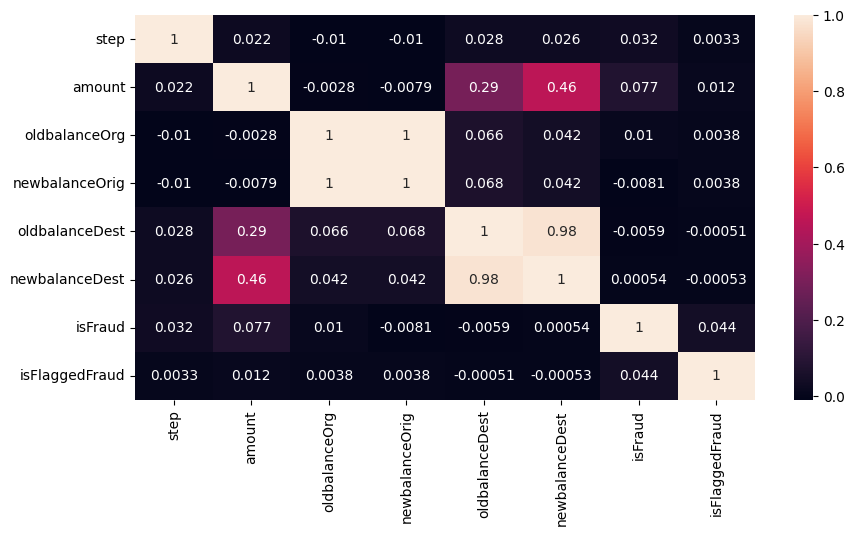

In [11]:
"""since *type* , *nameOrig* and *nameDest* are objective in nature
we will drop them and create a copy of original data
for vizualizing the correlation heatmap"""

df_corr = df.drop(columns = ["type","nameOrig","nameDest"])
corr = df_corr.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

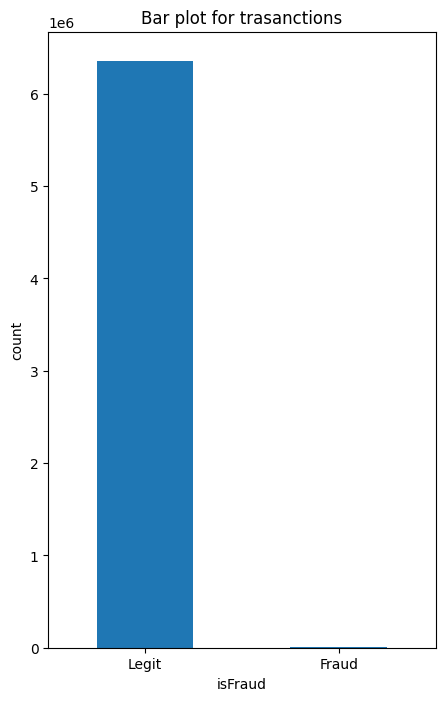

In [12]:
plt.figure(figsize = (5,8))
labels = ["Legit","Fraud"]
count_classes = df.value_counts(df["isFraud"],sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Bar plot for trasanctions")
plt.ylabel("count")
plt.xticks(range(2), labels)
plt.show()

In [13]:
#creating a copy for training and testing the data
new_df = df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
#checking how many are of object type
list_obj = new_df.select_dtypes(include='object').columns
print(list_obj)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in list_obj:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))
    
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [16]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [17]:
#checking for multicollinearity in data by using VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def cal_vif(new_df):
    vif = pd.DataFrame()
    vif["variables"] = new_df.columns
    vif["VIF"] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
    return(vif)

cal_vif(new_df)



,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [18]:
"""NewbalanceOrig and oldbalanceOrg are highly correlated, similar goes with
oldbalancedest and newbalanedest.
Also looking over the information we can see that namedest and nameOrig are connected to each other"""

#combining features with high collinearity and dropping individual ones

new_df["orig_amount"] = new_df.apply(lambda x: x["oldbalanceOrg"]- x["newbalanceOrig"], axis = 1)
new_df["dest_amount"] = new_df.apply(lambda x: x["oldbalanceDest"]- x["newbalanceDest"], axis = 1)
new_df["TransactionPath"] = new_df.apply(lambda x: x["nameDest"]+ x["nameOrig"], axis = 1)

#dropping individual columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

cal_vif(new_df)


,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,orig_amount,1.307910
5,dest_amount,3.754335
6,TransactionPath,2.677167


<Axes: >

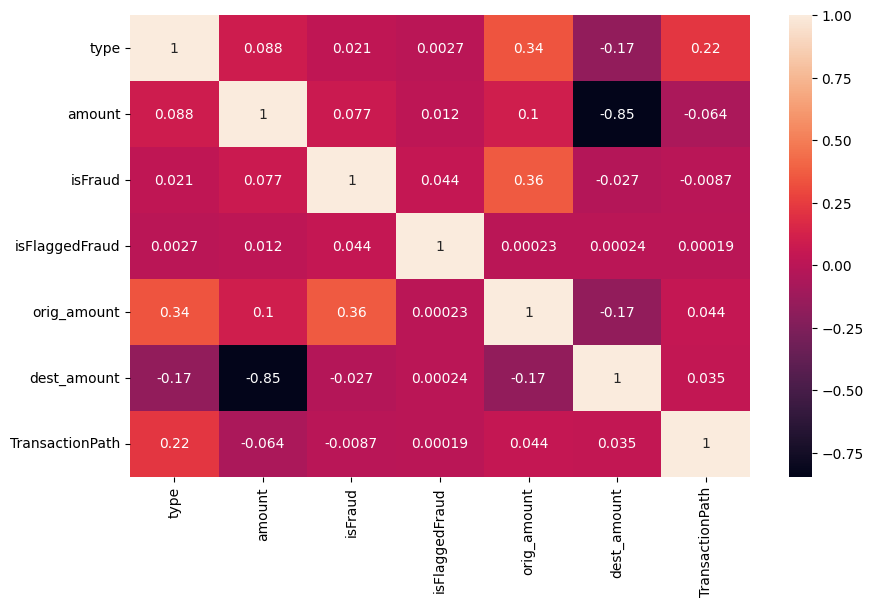

In [19]:
#generating correlation matrix of the new updated dataframe
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [20]:
#importing libraries and modules for building our model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
#scaling and normalizing our data for better model accuracy and standardization
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [22]:
#spliting the data in the training and testing dataset
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


In [23]:
#DECISION TREE
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test)*100

In [24]:
#RANDOM FORESTS
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test)*100

In [25]:
#score of classifiers
print("Decision Tree Score: ", decision_tree_score)
print("Random Forests Score: ", random_forest_score)

Decision Tree Score:  99.9226733641173
Random Forests Score:  99.95850765879464


In [26]:
#confusion matrix for decision tree
print("TP, FP, TN, FN - DECISION TREE")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()

print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("\nConfusion Matrix - Decision Tree")
print(confusion_matrix_dt)

print("---------------------------------------------------------------------------------------------------------")
#confusion matrix for random forests
print("TP, FP, TN, FN - RANDOM FORESTS")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()

print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("\nConfusion Matrix - Random Forest")
print(confusion_matrix_rf)
print("---------------------------------------------------------------------------------------------------------")


TP, FP, TN, FN - DECISION TREE
True Positives: 1714
False Positives: 755
True Negatives: 1905596
False Negatives: 721

Confusion Matrix - Decision Tree
[[1905596     755]
 [    721    1714]]
---------------------------------------------------------------------------------------------------------
TP, FP, TN, FN - RANDOM FORESTS
True Positives: 1712
False Positives: 69
True Negatives: 1906282
False Negatives: 723

Confusion Matrix - Random Forest
[[1906282      69]
 [    723    1712]]
---------------------------------------------------------------------------------------------------------


In [27]:
#classification report - dt
classification_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_dt)


print("---------------------------------------------------------------------------------------------------------")

#classification report - rf
classification_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forests")
print(classification_dt)




Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

---------------------------------------------------------------------------------------------------------
Classification Report - Random Forests
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.70      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786



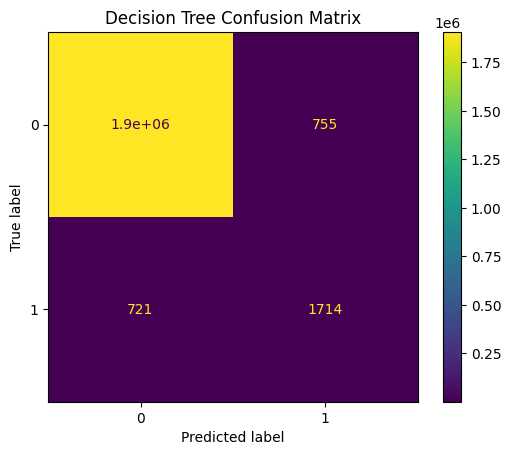

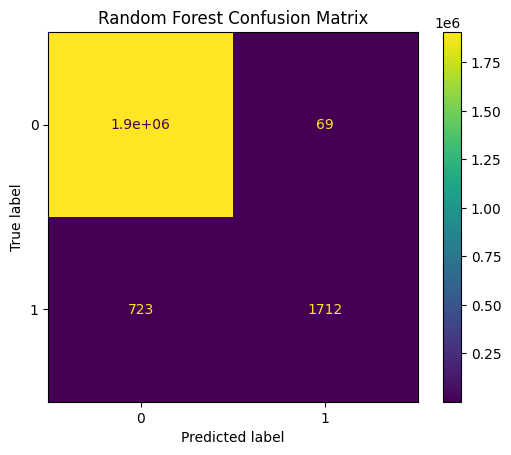

In [28]:
#confusion matrix - decision tree vizualization 
decision_cf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt)
decision_cf.plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()


#confusion matrix - random forests vizualization 
random_forest_cf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)
random_forest_cf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()



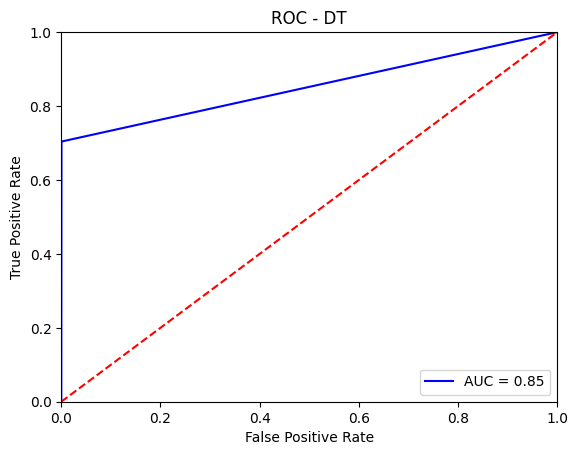

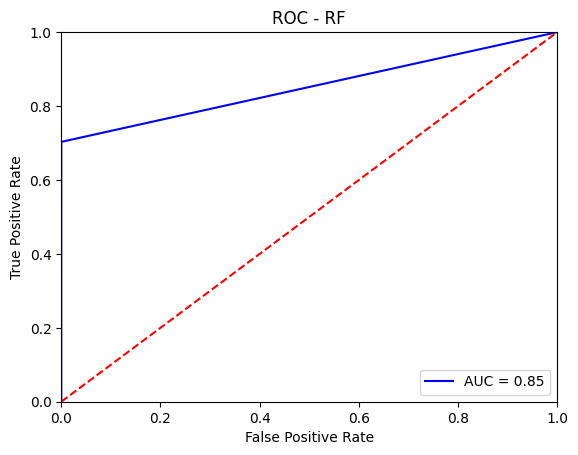

In [29]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()